In [5]:
# Title : Stock Price Prediction Using Linear Regression
# The objective is to predict stock prices using a dataset of Tesla's stock data from 2010 to 2020. 
# By employing linear regression, I aimed to analyze how certain features 
# (like opening price, high, low, and volume) influence the stock's closing price.

In [ ]:
import pandas as pd
df = pd.read_csv('TSLA.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [7]:
y = df['Close']
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [10]:
# Open: The opening price of the stock.High: The highest price of the stock during the trading day.
# Low: The lowest price of the stock during the trading day.
# Close: The closing price of the stock.
# Volume: The number of shares traded.
X = df[['Open', 'High', 'Low', 'Volume']]
X

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2411,568.489990,576.809998,558.080017,11788500
2412,575.690002,589.799988,567.429993,17801500
2413,632.419983,650.880005,618.000000,29005700
2414,640.000000,653.000000,632.520020,15719300


In [ ]:
### Data splitting - 80 % of X is in X_train and the rest 20 % of X is in X_test

In [11]:
from sklearn.model_selection import train_test_split
# assign random_state number so every time running the cell, can get the same number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [12]:
X_train

,Open,High,Low,Volume
322,25.370001,27.600000,25.020000,1769100
1127,212.380005,218.440002,211.800003,7483300
1855,305.500000,306.890015,301.299988,4725300
899,177.850006,180.479996,173.529999,7664300
54,20.980000,22.000000,20.790001,684600
...,...,...,...,...
350,32.919998,34.400002,32.730000,891000
1930,352.570007,355.239990,342.220001,6069700
79,20.160000,20.690001,20.040001,312500
1859,315.000000,316.350006,306.899994,5676100


In [13]:
X_test

,Open,High,Low,Volume
31,17.799999,17.900000,17.389999,691000
71,20.430000,20.790001,20.389999,267800
1016,219.990005,228.789993,215.449997,7203200
1694,251.559998,255.070007,250.509995,4059300
1736,312.799988,314.369995,306.799988,4329200
...,...,...,...,...
371,28.670000,29.170000,28.120001,700300
2204,288.299988,289.440002,283.880005,5478900
533,29.900000,30.000000,28.590000,1308900
2273,238.139999,241.500000,235.800003,7514400


In [ ]:
### Model building

In [14]:
# Train the model

from sklearn.linear_model import LinearRegression
# here is the LinearRegression() that will be represented by the variable lr
lr = LinearRegression()

# this means we want to train the empty linear regression model on the following dataset
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# so now the model is built - we want to apply this particular model to make a prediction

# applying the model to make a prediction
# specify X_train to be the data because we want to make a prediction here on the X_train
# so we can evaluate the performance
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [16]:
### Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

# calculate mse
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)

# calculate square correlation coefficient
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [17]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training SME', 'Training R2', 'Test SME', 'Test R2']
lr_results

,Method,Training SME,Training R2,Test SME,Test R2
0,Linear regression,4.15249,0.999708,4.031487,0.999712


In [ ]:
# I observed that the data points in my regression plot were close to the regression line, indicating a good fit. 
# This suggests that my model could accurately predict the closing prices based on the selected features.
# Additionally, I reported high R² values that were close to 1, 
# which indicates that my model explained a significant proportion of the variance in the target variable.

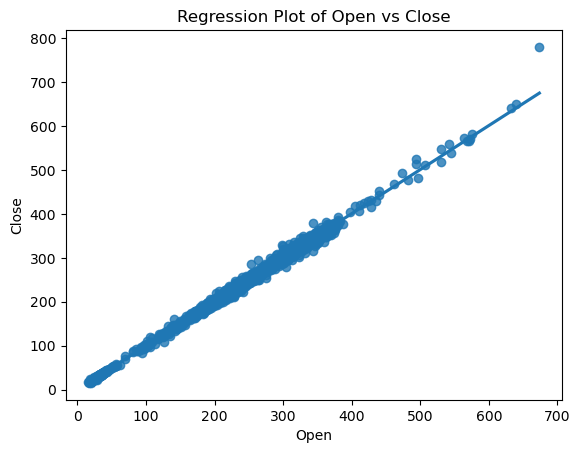

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you want to plot a regression between 'feature1' and 'target' columns
# Replace 'feature1' and 'target' with the actual column names from your DataFrame
sns.regplot(x='Open', y='Close', data=df)

# Add labels and title
plt.xlabel('Open')  # Replace with the actual feature name
plt.ylabel('Close')  # Replace with the actual target variable name
plt.title('Regression Plot of Open vs Close')

# Show the plot
plt.show()

In [ ]:
# Low Residuals: When the points are near the line, it means that the residuals 
# (the differences between the actual data points and the predicted values from the regression line) are small. 
# This indicates that the model's predictions are close to the actual values.

In [ ]:
# I noticed that the data points in my regression plot were close to the regression line, which indicates a good fit. 
# This suggests that my model can accurately predict the closing prices based on the features I selected.
# I also found that the R² values were high, nearly reaching 1. 
# This means my model explained a significant portion of the variance in the target variable.